<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/04_26_Annotation_1MPair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from google.colab import drive
import csv
import os
import re
import pandas as pd
import numpy as np

directory = '/content/drive/MyDrive/finalMetaFile'
df = pd.read_csv(os.path.join(directory, 'combined_metadata_final12_features.csv'))
df=df[['sourcename', 'title']]


df['sourcename'] = df['sourcename'].apply(lambda x: x.replace('metadata_', ''))
df['sourcename'] = df['sourcename'].apply(lambda x: x.replace('_unifiedColName.csv', ''))
df['sourcename'].replace(['url1_ie_table_complete', 'scopus_fixed_encoding','SSRN'], ['3ie', 'scopus','ssrn'], inplace=True)


Mounted at /content/drive


<ipython-input-1-54ccb68a7028>:18: DtypeWarning: Columns (1,2,3,4,5,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'combined_metadata_final12_features.csv'))


In [5]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

df['title'] = df['title'].str.lower()

def remove_non_english(df):
  def is_english(text):
    words = word_tokenize(text)
    english_word_count = sum(len(word) >= 2 for word in words)
    return english_word_count / len(words) >= 0.9

  df_filtered = df[df['title'].apply(is_english)]
  return df_filtered

df['title'] = df['title'].astype(str)
df = df[~df['title'].str.contains('و|д|я|š|ü|à|é|ś|ä|ú|의|θ|λ|ό|τ|η|τ|α|の|と', regex=True)]
df = remove_non_english(df.copy())
def count_words(title):
  words = title.split()
  return len(words)

df['word_count'] = df['title'].apply(count_words)
df.to_csv(os.path.join(directory, 'combined_metadata_final12_features_MakePair.csv'), index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:

# Filter the DataFrame by sourcename.
df_3ie = df[df['sourcename'] == '3ie']
df_econlit = df[df['sourcename'] == 'econlit']
df_ssrn = df[df['sourcename'] == 'ssrn']
df_elsevier = df[df['sourcename'] == 'elsevier']
df_repec = df[df['sourcename'] == 'repec']
df_scopus = df[df['sourcename'] == 'scopus']
df_jstor = df[df['sourcename'] == 'jstor']
df_semantic_scholar = df[df['sourcename'] == 'semantic_scholar']
df_repec = df_repec[df_repec['word_count'] < 1000]

In [58]:
min=5
max=20

df_3ie_min_max = df_3ie[(df_3ie['word_count'] >= min) & (df_3ie['word_count'] <= max)]
df_econlit_min_max = df_econlit[(df_econlit['word_count'] >= min) & (df_econlit['word_count'] <= max)]
df_ssrn_min_max = df_ssrn[(df_ssrn['word_count'] >= min) & (df_ssrn['word_count'] <= max)]
df_elsevier_min_max = df_elsevier[(df_elsevier['word_count'] >= min) & (df_elsevier['word_count'] <= max)]
df_repec_min_max = df_repec[(df_repec['word_count'] >= min) & (df_repec['word_count'] <= max)]
df_scopus_min_max = df_scopus[(df_scopus['word_count'] >= min) & (df_scopus['word_count'] <= max)]
df_jstor_min_max = df_jstor[(df_jstor['word_count'] >= min) & (df_jstor['word_count'] <= max)]
df_semantic_scholar_min_max = df_semantic_scholar[(df_semantic_scholar['word_count'] >= min) & (df_semantic_scholar['word_count'] <= max)]

def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size)
  else:
    return df

import math

title_sample_size=round(math.sqrt(1000000)/8)

df_3ie_min_max = sample_dataframe(df_3ie_min_max, title_sample_size)
df_econlit_min_max = sample_dataframe(df_econlit_min_max, title_sample_size)
df_ssrn_min_max = sample_dataframe(df_ssrn_min_max, title_sample_size)
df_elsevier_min_max = sample_dataframe(df_elsevier_min_max, title_sample_size)
df_repec_min_max = sample_dataframe(df_repec_min_max, title_sample_size)
df_scopus_min_max = sample_dataframe(df_scopus_min_max, title_sample_size)
df_jstor_min_max = sample_dataframe(df_jstor_min_max, title_sample_size)
df_semantic_scholar_min_max = sample_dataframe(df_semantic_scholar_min_max, title_sample_size)

df_make_pair = pd.concat([df_3ie_min_max, df_econlit_min_max, df_ssrn_min_max, df_elsevier_min_max, df_repec_min_max, df_scopus_min_max, df_jstor_min_max, df_semantic_scholar_min_max])

#df_make_pair.to_csv(os.path.join(directory, 'combined_metadata_final12_features_MakePair_annotation.csv'), index=False)

In [59]:
len(df_make_pair)

1000

In [22]:
df_make_pair.head()

,sourcename,title,word_count
10219522,3ie,do forest-management plans and fsc certificati...,13
10216207,3ie,change in trend of contraceptive uptake—effect...,11
10217821,3ie,shift schedule realignment and patient safety ...,7
10218234,3ie,randomized controlled trial of the effect of z...,16
10220116,3ie,empowering women: how mexico's conditional cas...,15


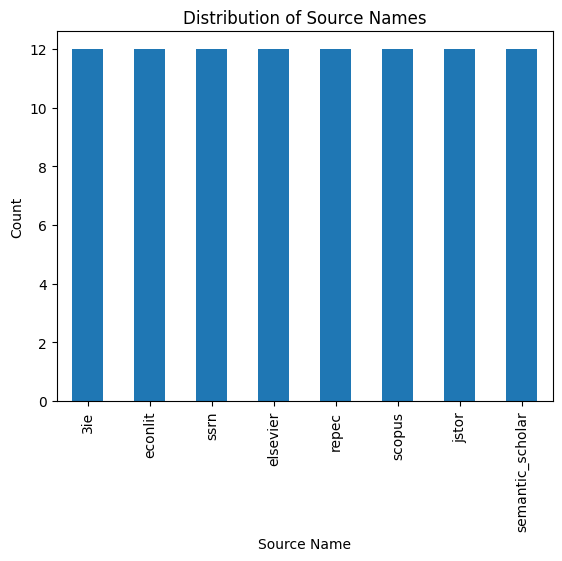

In [38]:
import matplotlib.pyplot as plt

df_make_pair['sourcename'].value_counts().plot(kind='bar')
plt.xlabel('Source Name')
plt.ylabel('Count')
plt.title('Distribution of Source Names')
plt.show()

In [60]:
# prep to make a pair

from string import printable
from collections import Counter

printable_dict = {c:i for i,c in enumerate(printable)}

def vectorize(title):
    cnt = Counter(title)
    array = [0 for _ in printable]+[0]
    for c,n in cnt.items():
        if c in printable_dict:
            array[printable_dict[c]]=n
        else:
            array[-1]+=n
    return np.array(array)

vects = []
for title in df_make_pair.title:
    vects.append(vectorize(title))

In [61]:
threshold = 1000 # force very high to return all possible pair
min_length = 5 # was 10 but change to 5 to keep all sampled titles


with open('/content/drive/MyDrive/finalMetaFile/counterVect_L1_1MPair_annotation.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Title 1", "Title 2", "Similarity Score"])
# Iterate over title pairs
  for i, v1 in enumerate(vects):
    if sum(v1[:-1]) > min_length: # Only above a minimum number of printable characters
        for j, v2 in enumerate(vects):
            if sum(v2[:-1]) > min_length:
                if i!=j:
                    l1 = np.linalg.norm((v1[:-1] - v2[:-1]), ord=1)
                    if l1 < threshold:
                        t1 = df_make_pair.iloc[i].title
                        t2 = df_make_pair.iloc[j].title
                        writer.writerow([t1, t2, l1])
                        #print(f"{t1} _&_ {t2} (L1: {l1:.0f})")

In [62]:
df_annotation = pd.read_csv(os.path.join(directory, 'counterVect_L1_1MPair_annotation.csv'))
df_annotation['annotation_label']=0
df_annotation.head()

,Title 1,Title 2,Similarity Score,annotation_label
0,determinants of school enrolment in indonesia:...,transportation infrastructure and productivity...,56.0,0
1,determinants of school enrolment in indonesia:...,sexual risk behavior among hiv-infected women ...,38.0,0
2,determinants of school enrolment in indonesia:...,measuring the net benefits of payments for hyd...,30.0,0
3,determinants of school enrolment in indonesia:...,are smart cities more ecologically efficient? ...,32.0,0
4,determinants of school enrolment in indonesia:...,policy cognition is more effective than step t...,51.0,0


In [63]:
df_annotation['annotation_label'] = df_annotation.apply(lambda row: 1 if row['Title 1'] == row['Title 2'] else 0, axis=1)

In [64]:
df_annotation['annotation_label'].sum()/len(df_annotation)

2.002002002002002e-06

In [65]:
df_annotation[df_annotation['annotation_label']==1]


,Title 1,Title 2,Similarity Score,annotation_label
71190,direct democracy and resource allocation: expe...,direct democracy and resource allocation: expe...,0.0,1
261809,direct democracy and resource allocation: expe...,direct democracy and resource allocation: expe...,0.0,1


In [66]:
len(df_annotation)

999000

# match based on length of title

In [67]:
%%time
import numpy as np
with open('/content/drive/MyDrive/finalMetaFile/counterVect_L1_1MPair_annotation_similarLengthTitleUpto3Words.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Title 1", "Title 2", "Similarity Score"])
# Iterate over title pairs
  for i, v1 in enumerate(vects):
    if sum(v1[:-1]) > min_length: # Only above a minimum number of printable characters
        for j, v2 in enumerate(vects):
            if sum(v2[:-1]) > min_length:
                if i!=j:
                    if abs(len(v1[:-1]) - len(v2[:-1])) <= 3:
                        l1 = np.linalg.norm((v1[:-1] - v2[:-1]), ord=1)
                        if l1 < threshold:
                            t1 = df_make_pair.iloc[i].title
                            t2 = df_make_pair.iloc[j].title
                            writer.writerow([t1, t2, l1])
                            #print(f"{t1} _&_ {t2} (L1: {l1:.0f})")


CPU times: user 4min 8s, sys: 6.86 s, total: 4min 15s
Wall time: 4min 15s


In [68]:
df_annotation_simialrLength = pd.read_csv(os.path.join(directory, 'counterVect_L1_1MPair_annotation_similarLengthTitleUpto3Words.csv'))
df_annotation_simialrLength['annotation_label']=0
df_annotation_simialrLength.head()

,Title 1,Title 2,Similarity Score,annotation_label
0,determinants of school enrolment in indonesia:...,transportation infrastructure and productivity...,56.0,0
1,determinants of school enrolment in indonesia:...,sexual risk behavior among hiv-infected women ...,38.0,0
2,determinants of school enrolment in indonesia:...,measuring the net benefits of payments for hyd...,30.0,0
3,determinants of school enrolment in indonesia:...,are smart cities more ecologically efficient? ...,32.0,0
4,determinants of school enrolment in indonesia:...,policy cognition is more effective than step t...,51.0,0


In [69]:
df_annotation_simialrLength['annotation_label'] = df_annotation_simialrLength.apply(lambda row: 1 if row['Title 1'] == row['Title 2'] else 0, axis=1)
df_annotation_simialrLength['annotation_label'].sum()/len(df_annotation_simialrLength)

2.002002002002002e-06

In [70]:
df_annotation_simialrLength[df_annotation_simialrLength['annotation_label']==1]


,Title 1,Title 2,Similarity Score,annotation_label
71190,direct democracy and resource allocation: expe...,direct democracy and resource allocation: expe...,0.0,1
261809,direct democracy and resource allocation: expe...,direct democracy and resource allocation: expe...,0.0,1


In [71]:
len(df_annotation_simialrLength)

999000